In [1]:
!pip install fredapi

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import fredapi as fd
import plotly.express as px

In [3]:
fred=fd.Fred(api_key='ad4cae947689770d41b22c4e2235e2ac')

In [4]:
 data=fred.search('Consumer Price Index for All Urban Consumers: All Items in U.S. City Average')
 data.head(10)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CPIAUCSL,CPIAUCSL,2023-12-06,2023-12-06,Consumer Price Index for All Urban Consumers: ...,1947-01-01,2023-10-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-11-14 07:52:02-06:00,94,The Consumer Price Index for All Urban Consume...
CPIAUCNS,CPIAUCNS,2023-12-06,2023-12-06,Consumer Price Index for All Urban Consumers: ...,1913-01-01,2023-10-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-11-14 07:52:02-06:00,72,Handbook of Methods (https://www.bls.gov/opub/...
CUUS0000SA0,CUUS0000SA0,2023-12-06,2023-12-06,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2023-01-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-07-12 09:01:02-05:00,44,None
CPILFESL,CPILFESL,2023-12-06,2023-12-06,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2023-10-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Seasonally Adjusted,SA,2023-11-14 07:51:02-06:00,81,"The ""Consumer Price Index for All Urban Consum..."
CPILFENS,CPILFENS,2023-12-06,2023-12-06,Consumer Price Index for All Urban Consumers: ...,1957-01-01,2023-10-01,Monthly,M,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-11-14 07:51:06-06:00,52,The “Consumer Price Index for All Urban Consum...
CUUS0000SA0L1E,CUUS0000SA0L1E,2023-12-06,2023-12-06,Consumer Price Index for All Urban Consumers: ...,1984-01-01,2023-01-01,Semiannual,SA,Index 1982-1984=100,Index 1982-1984=100,Not Seasonally Adjusted,NSA,2023-07-12 09:01:04-05:00,10,None
APU0000708111,APU0000708111,2023-12-06,2023-12-06,"Average Price: Eggs, Grade A, Large (Cost per ...",1980-01-01,2023-10-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2023-11-14 07:39:01-06:00,76,"Large white, Grade A chicken eggs, sold in a c..."
APU0000703112,APU0000703112,2023-12-06,2023-12-06,"Average Price: Ground Beef, 100% Beef (Cost pe...",1984-01-01,2023-10-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2023-11-14 07:39:03-06:00,66,Fresh regular 100% ground beef excluding round...
APU000072610,APU000072610,2023-12-06,2023-12-06,Average Price: Electricity per Kilowatt-Hour i...,1978-11-01,2023-10-01,Monthly,M,U.S. Dollars,U.S. $,Not Seasonally Adjusted,NSA,2023-11-14 07:38:02-06:00,65,All electricity. Average consumer prices are ...


In [5]:
data['title'][0]

'Consumer Price Index for All Urban Consumers: All Items in U.S. City Average'

In [6]:
cpi=fred.get_series('CPIAUCSL')
cpi.name='values'
cpi

1947-01-01     21.480
1947-02-01     21.620
1947-03-01     22.000
1947-04-01     22.000
1947-05-01     21.950
               ...   
2023-06-01    303.841
2023-07-01    304.348
2023-08-01    306.269
2023-09-01    307.481
2023-10-01    307.619
Name: values, Length: 922, dtype: float64

In [7]:
df=pd.DataFrame(cpi).reset_index()
df

,index,values
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
917,2023-06-01,303.841
918,2023-07-01,304.348
919,2023-08-01,306.269
920,2023-09-01,307.481


In [8]:
df2=df[df['index'] >'1989-12-01']
df2

,index,values
516,1990-01-01,127.500
517,1990-02-01,128.000
518,1990-03-01,128.600
519,1990-04-01,128.900
520,1990-05-01,129.100
...,...,...
917,2023-06-01,303.841
918,2023-07-01,304.348
919,2023-08-01,306.269
920,2023-09-01,307.481


In [9]:
fig=px.line(df2,x='index',y='values', title='CPI avg 1990-2022')
fig.show()

In [10]:
df2=df2.rename(columns={'index':'ds','values':'y'})

In [11]:
from prophet import Prophet
ml=Prophet()
ml.fit(df2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqlmi7vp9/uvdub2x_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqlmi7vp9/3pxhi7nc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14660', 'data', 'file=/tmp/tmpqlmi7vp9/uvdub2x_.json', 'init=/tmp/tmpqlmi7vp9/3pxhi7nc.json', 'output', 'file=/tmp/tmpqlmi7vp9/prophet_modell8o4yr6e/prophet_model-20231207004718.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:47:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:47:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [12]:
future=ml.make_future_dataframe(periods=10, freq='MS') #if we want it weekly just put 'w'

In [13]:
future.tail()

,ds
411,2024-04-01
412,2024-05-01
413,2024-06-01
414,2024-07-01
415,2024-08-01


In [14]:
result=ml.predict(future)
result

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,129.606345,124.945566,133.458670,129.606345,129.606345,-0.130740,-0.130740,-0.130740,-0.130740,-0.130740,-0.130740,0.0,0.0,0.0,129.475605
1,1990-02-01,129.962837,125.885754,134.258594,129.962837,129.962837,0.027878,0.027878,0.027878,0.027878,0.027878,0.027878,0.0,0.0,0.0,129.990715
2,1990-03-01,130.284830,125.972947,134.495486,130.284830,130.284830,-0.008731,-0.008731,-0.008731,-0.008731,-0.008731,-0.008731,0.0,0.0,0.0,130.276098
3,1990-04-01,130.641322,126.675437,134.855650,130.641322,130.641322,0.016409,0.016409,0.016409,0.016409,0.016409,0.016409,0.0,0.0,0.0,130.657731
4,1990-05-01,130.986315,126.986721,135.378025,130.986315,130.986315,0.021070,0.021070,0.021070,0.021070,0.021070,0.021070,0.0,0.0,0.0,131.007385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,2024-04-01,302.959177,298.593147,306.913065,302.907200,303.011145,-0.197047,-0.197047,-0.197047,-0.197047,-0.197047,-0.197047,0.0,0.0,0.0,302.762130
412,2024-05-01,303.697553,299.441833,307.932479,303.601666,303.779271,-0.144324,-0.144324,-0.144324,-0.144324,-0.144324,-0.144324,0.0,0.0,0.0,303.553229
413,2024-06-01,304.460541,300.635155,308.783447,304.320279,304.576408,0.288658,0.288658,0.288658,0.288658,0.288658,0.288658,0.0,0.0,0.0,304.749200
414,2024-07-01,305.198917,301.281591,309.888401,305.031575,305.348245,0.297287,0.297287,0.297287,0.297287,0.297287,0.297287,0.0,0.0,0.0,305.496205


In [15]:
result=ml.predict(future)
result[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,1990-01-01,129.475605,124.974702,133.572448
1,1990-02-01,129.990715,125.720817,134.149404
2,1990-03-01,130.276098,125.730208,134.426165
3,1990-04-01,130.657731,126.268022,134.642832
4,1990-05-01,131.007385,127.035495,135.259521
...,...,...,...,...
411,2024-04-01,302.762130,298.773075,306.858516
412,2024-05-01,303.553229,299.194378,308.090801
413,2024-06-01,304.749200,300.526652,308.969149
414,2024-07-01,305.496205,301.475323,309.879736


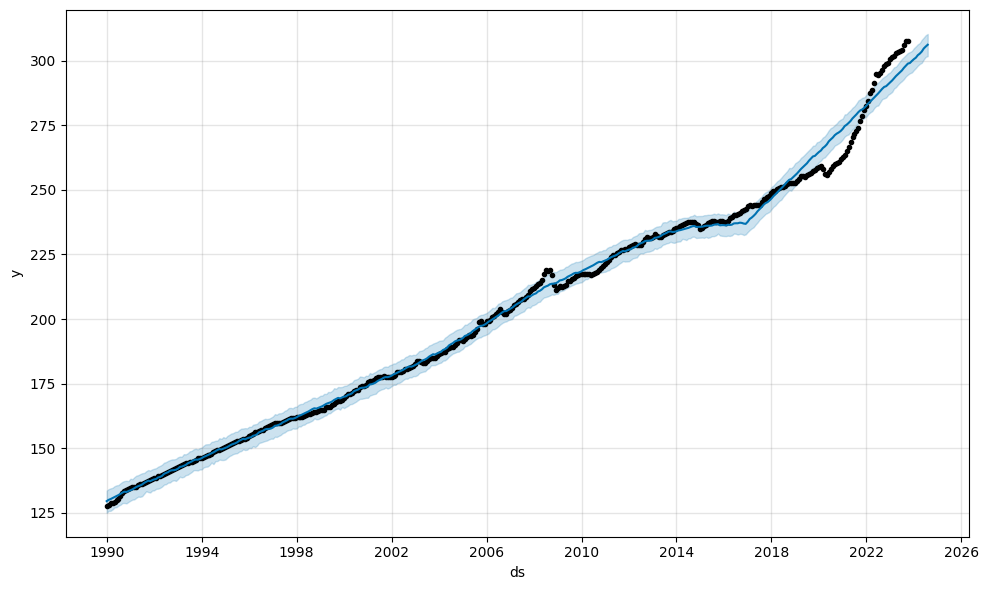

In [16]:
fig=ml.plot(result)

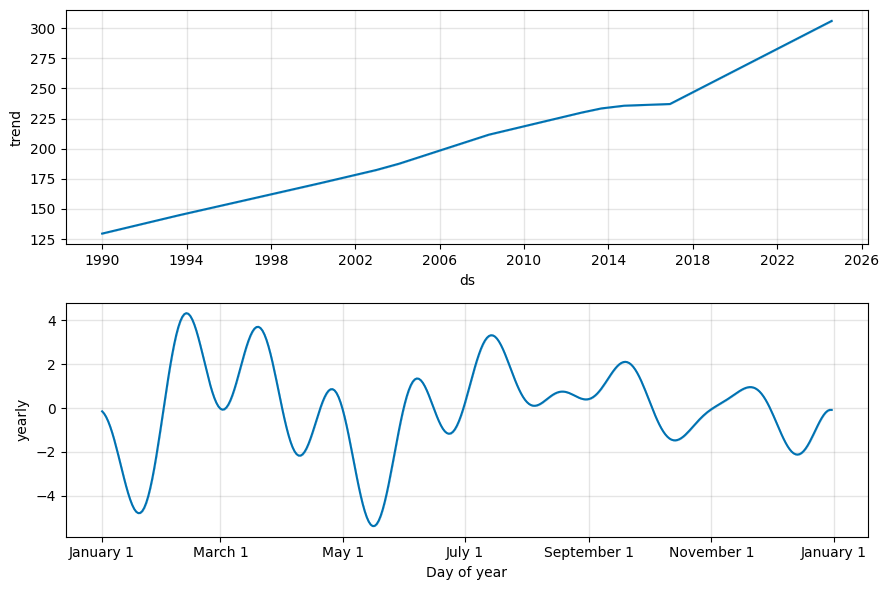

In [17]:

fig2=ml.plot_components(result)

In [18]:
from prophet.diagnostics import  cross_validation,performance_metrics
cv_result=cross_validation(model=ml,initial=pd.to_timedelta(30*20,unit='D'),period=pd.to_timedelta(30*5,unit='D'),horizon=pd.to_timedelta(30*12,unit='D'))
df_p=performance_metrics(cv_result)

INFO:prophet:Making 76 forecasts with cutoffs between 1991-12-18 00:00:00 and 2022-10-06 00:00:00


  0%|          | 0/76 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 18.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqlmi7vp9/hjp6n6fp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqlmi7vp9/yqqns22j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34578', 'data', 'file=/tmp/tmpqlmi7vp9/hjp6n6fp.json', 'init=/tmp/tmpqlmi7vp9/yqqns22j.json', 'output', 'file=/tmp/tmpqlmi7vp9/prophet_model30o31hlh/prophet_model-20231207005057.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:50:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:51:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 22.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpqlmi7vp9/60v1ddxl.json
DEBUG:cmdstanpy:input tempfi

In [19]:
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,36 days,12.613551,3.551556,1.972646,0.008392,0.005965,0.008442,0.211111
1,37 days,12.574737,3.546088,1.965842,0.008380,0.005965,0.008430,0.207407
2,38 days,12.524296,3.538968,1.951518,0.008311,0.005965,0.008360,0.211111
3,39 days,12.539476,3.541112,1.961244,0.008343,0.005974,0.008392,0.211111
4,40 days,12.710615,3.565195,1.994497,0.008497,0.005974,0.008548,0.222222
...,...,...,...,...,...,...,...,...
320,356 days,51.572841,7.181423,4.178078,0.017154,0.011631,0.017401,0.392593
321,357 days,54.305225,7.369208,4.266626,0.017415,0.011631,0.017677,0.392593
322,358 days,50.927397,7.136343,4.116164,0.016874,0.011539,0.017116,0.396296
323,359 days,46.497331,6.818895,3.976041,0.016463,0.011631,0.016682,0.388889


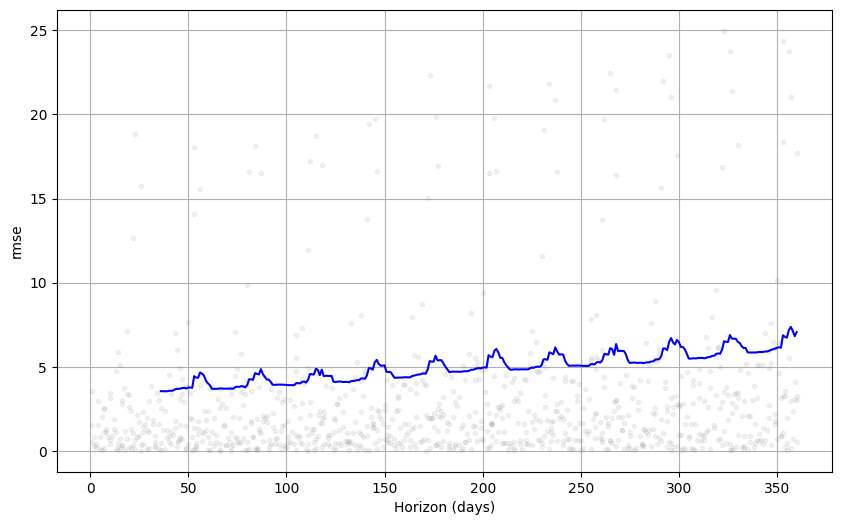

In [20]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(cv_result,metric='rmse')

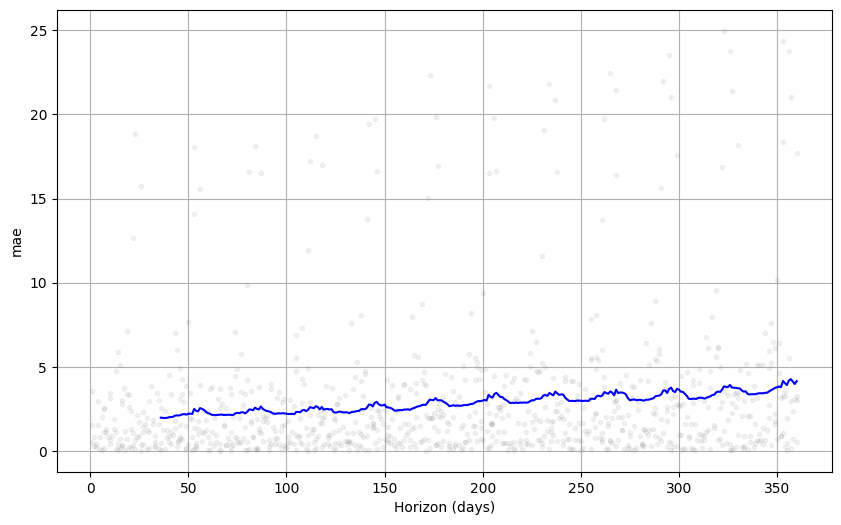

In [21]:
from prophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(cv_result,metric='mae')